In [83]:
import redis
import numpy as np
from mxnet import recordio
import mxnet as mx
import matplotlib.pyplot as plt
from time import time

In [56]:
imgrec = recordio.MXIndexedRecordIO('/data/share/faces_emore/train.idx','/data/share/faces_emore/train.rec','r')
s0 = imgrec.read_idx(0)
header, _ = recordio.unpack(s0)
start, end = header.label

In [67]:
s = imgrec.read_idx(1)
_, img = recordio.unpack(s)
type(img)

bytes

## open redis
turn on redis:  
(commandline) redis-server /etc/redis/redis.conf  

change the path where to store redis data:  
(commandline) redis-cli  
(commandline) config set dir [path]

In [84]:
r = redis.Redis(host='127.0.0.1', port=6379)

In [68]:
r.set(1, img)

True

In [15]:
img_ = r.get(1)

In [16]:
img1 = mx.image.imdecode(img)
img1_ = mx.image.imdecode(img_)
type(img1)

mxnet.ndarray.ndarray.NDArray

In [17]:
img1 = img1.asnumpy()
img1_ = img1_.asnumpy()

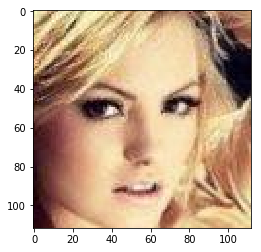

In [19]:
plt.imshow(img1)

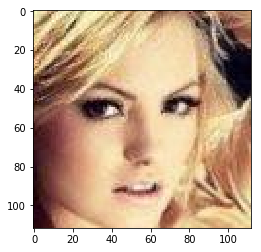

In [20]:
plt.imshow(img1_)

In [77]:
r.get(1)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00p\x00p\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd

In [57]:
# emore
(start, end)

(5822654.0, 5908396.0)

## store in redis  

In [80]:
p = int(start) // 3
tic = time()
for i in range(1, p):
    s = imgrec.read_idx(i)
    _, img = recordio.unpack(s)
    r.set(i, img)
    if i%100000 == 0:
        tok = time()
        print(f'{i} finished: {tok-tic} s')
        tic = time()

2000000 finished: 8.553271293640137 s
2100000 finished: 14.549275875091553 s
2200000 finished: 14.930912971496582 s
2300000 finished: 14.460179567337036 s
2400000 finished: 14.507625341415405 s
2500000 finished: 14.526214599609375 s
2600000 finished: 15.322028875350952 s
2700000 finished: 14.878095865249634 s
2800000 finished: 14.48595905303955 s
2900000 finished: 14.94979214668274 s
3000000 finished: 11.800705671310425 s
3100000 finished: 10.214158535003662 s
3200000 finished: 11.602372169494629 s
3300000 finished: 8.83862590789795 s
3400000 finished: 8.37633490562439 s
3500000 finished: 9.436074495315552 s
3600000 finished: 9.054562330245972 s
3700000 finished: 8.59507441520691 s
3800000 finished: 9.039555072784424 s
3900000 finished: 8.487293004989624 s
4000000 finished: 7.843310832977295 s
4100000 finished: 13.352620601654053 s
4200000 finished: 14.26968789100647 s
4300000 finished: 14.65242052078247 s
4400000 finished: 14.773268938064575 s
4500000 finished: 13.878104448318481 s
46

## test speed

In [106]:
lst = np.arange(50000)
np.random.shuffle(lst)
tic = time()
for i in lst:
    s = imgrec.read_idx(i)
    _, img = recordio.unpack(s)
toc = time()
print(f'recordio: 5w/{toc-tic} s')

tic = time()
for i in lst:
    img = r.get(str(i))
toc = time()
print(f'redis: 5w/{toc-tic} s')

recordio: 5w/0.8532114028930664 s
redis: 5w/3.3940324783325195 s


In [107]:
lst1 = np.arange(5822653)
np.random.shuffle(lst1)
lst = lst1[:50000]
tic = time()
for i in lst:
    s = imgrec.read_idx(i)
    _, img = recordio.unpack(s)
toc = time()
print(f'recordio: 5w/{toc-tic} s')

tic = time()
for i in lst:
    img = r.get(str(i))
toc = time()
print(f'redis: 5w/{toc-tic} s')

recordio: 5w/63.39771795272827 s
redis: 5w/3.703496217727661 s


In [108]:
lst1 = np.arange(5822653)
np.random.shuffle(lst1)
lst = lst1[:300]
tic = time()
for i in lst:
    s = imgrec.read_idx(i)
    _, img = recordio.unpack(s)
toc = time()
print(f'recordio: 300/{toc-tic} s')

tic = time()
for i in lst:
    img = r.get(str(i))
toc = time()
print(f'redis: 300/{toc-tic} s')

recordio: 5w/0.3426508903503418 s
redis: 5w/0.027191877365112305 s


## save in disk
(commandline) redis-cli shutdown  
or use the line below:

In [ ]:
r.save()